In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('Данные.csv', sep=';')

In [30]:
df.head()

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.0,0.0001,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.00132,5.01,0.736,0.0208,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.0,0.0001,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.00240,4.52,0.736,0.0550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.0,0.0001,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.00156,5.49,0.735,0.0363,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.0,0.0001,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.00136,4.96,0.735,0.0325,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.0,0.0001,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.00175,5.25,0.735,0.0388,2.210000e-07


In [31]:
df = df.dropna()

Look at the power distribution. 

Text(0.5, 1.0, 'Power hist')

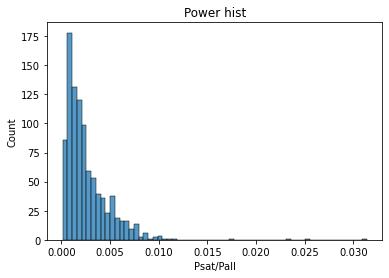

In [32]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Delete all the blowout(rho>0.012) 

In [33]:
df = df[df['Psat/Pall']<0.012]

In [ ]:
Create a new feature log(Psat/Pall)

In [34]:
df['log'] = np.log(df[['Psat/Pall']])

In [35]:
df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)

Text(0.5, 1.0, 'Power hist')

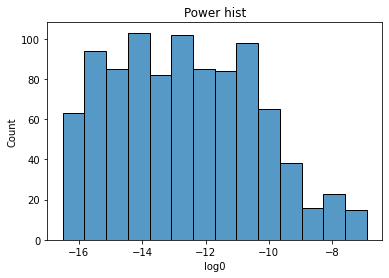

In [36]:
sns.histplot(df, x='log0')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

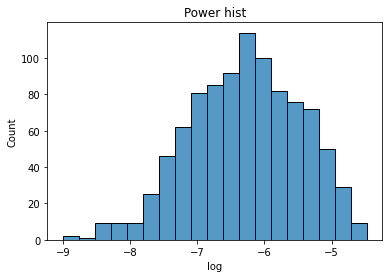

In [37]:
sns.histplot(df, x='log')
plt.title("Power hist")

Text(0.5, 1.0, 'L_sat hist')

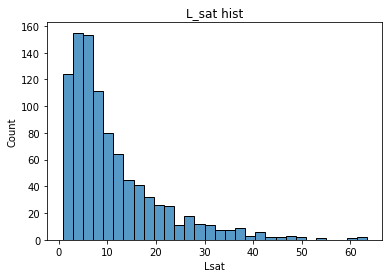

In [38]:
sns.histplot(df, x='Lsat')
plt.title("L_sat hist")

Text(0.5, 1.0, 'L_sat hist')

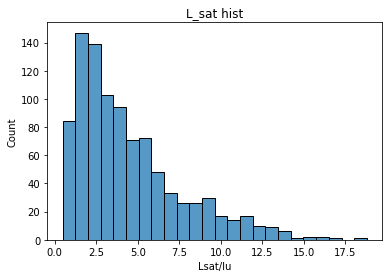

In [39]:
sns.histplot(df, x='Lsat/lu')
plt.title("L_sat hist")

Text(0.5, 1.0, 'lambda')

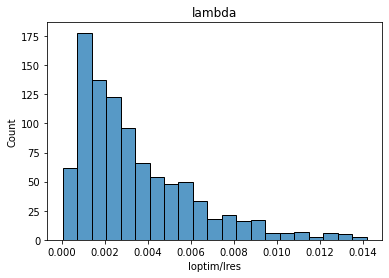

In [40]:
sns.histplot(df, x='loptim/lres')
plt.title("lambda")

In [41]:
df1 = df.drop(columns=['P0', 'P0/Pall', 'Psat', 'Lsat', 'loptim','lres', 'loptim/lres', 'Psat/Pall', 'Lsat/lu', 'f', 'rho', 'log'])

In [42]:
df1.tail()

,k,lu,I,gamma,sgamma,r,log0
952,1.92,1.24,600.0,2000.0,0.0002,0.00004,-15.589811
953,1.92,1.24,600.0,4470.0,0.0002,0.00004,-16.394052
954,1.92,1.24,600.0,837.0,0.0002,0.00004,-10.113562
955,3.81,1.24,80.0,1000.0,0.0002,0.00004,-10.505068
956,3.81,1.24,80.0,2830.0,0.0002,0.00004,-16.150514


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

clf1 = RandomForestRegressor(max_depth=20, random_state=0)
clf1.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf1.predict(X_test)))

0.22281251689299772

Try to scale the data. It doesn't make sense. 

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))

0.22265388841137893

Train the classificator for the saturation length.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


clf2 = RandomForestRegressor(max_depth=20, random_state=0)
clf2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf2.predict(X_test))

0.18128338009375258

The classificator for the optimum wavelength.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['loptim/lres'], test_size=0.2, random_state=42)



clf3 = RandomForestRegressor(max_depth=20, random_state=0)
clf3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf3.predict(X_test))

0.40904564931280823

In [59]:
X = pd.DataFrame({'k':[3.5], 'lu':[3], 'I':[3000], 'gamma':[26600], 'sgamma':[0.0001], 
                  'r':[0.000024], 'log0':[100000]})

X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)


print('P_sat=', (np.exp(clf1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (clf2.predict(X)*X['lu'])[0])
print('l_optim=', ((clf3.predict(X)+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 18789626753.34721
L_sat= 43.04099999999996
l_optim= 1.5126632596854863e-10
l_res= 1.5104726100966703e-10


In [49]:
y_pred = clf1.predict(df1)
err = abs(2*(np.exp(y_pred)-df['Psat/Pall'])/(np.exp(y_pred)+df['Psat/Pall']))
err.sort_values()

128    0.000086
567    0.000164
887    0.000249
830    0.000285
273    0.000292
         ...   
209    0.805956
766    0.811923
547    0.851010
571    0.925494
898    1.432376
Name: Psat/Pall, Length: 953, dtype: float64

In [50]:
y_pred = clf2.predict(df1)
err = abs(2*(y_pred-df['Lsat'])/(y_pred+df['Lsat']))
err.sort_values()

26     0.001101
948    0.002956
771    0.003155
949    0.004679
773    0.006006
         ...   
250    1.252041
496    1.252097
365    1.252715
436    1.256430
439    1.292628
Name: Lsat, Length: 953, dtype: float64

In [51]:
y_pred = clf3.predict(df1)
err = abs(2*(y_pred-df['loptim/lres'])/(y_pred+df['loptim/lres']))
err.sort_values()

739    0.000087
643    0.000098
720    0.000197
829    0.000491
729    0.000529
         ...   
699    1.103455
681    1.144743
415    1.533171
790    1.646950
705    1.748072
Name: loptim/lres, Length: 953, dtype: float64

Do the same with gradient boosting. 

In [52]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [53]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'rmse',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [55]:
study = optuna.create_study(direction='minimize')


[I 2023-03-05 10:26:07,065] A new study created in memory with name: no-name-7aaead6e-b938-4ec1-81c4-fc8f760cf4bd


In [56]:
study.optimize(objective, n_trials=1000)


C:\Users\user\AppData\Local\Temp\ipykernel_11240\3075619752.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
C:\Users\user\AppData\Local\Temp\ipykernel_11240\3075619752.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\user\AppData\Local\Temp\ipykernel_11240\3075619752.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': 

KeyboardInterrupt: 

In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


In [ ]:
params = trial.params
model1 = xgb.XGBRegressor(**params)

In [ ]:
model1.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(model1.predict(X_test)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


In [ ]:
study = optuna.create_study(direction='minimize')

In [ ]:
study.optimize(objective, n_trials=1000)

In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

In [ ]:
params = trial.params
model2 = xgb.XGBRegressor(**params)

In [ ]:
model2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model2.predict(X_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['loptim/lres'], test_size=0.2, random_state=42)

In [ ]:
study = optuna.create_study(direction='minimize')

In [ ]:
study.optimize(objective, n_trials=1000)

In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

In [ ]:
params = trial.params
model3 = xgb.XGBRegressor(**params)

In [ ]:
model3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model3.predict(X_test))

In [ ]:
X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)


print('P_sat=', (np.exp(model1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (model2.predict(X)*X['lu'])[0])
print('l_optim=', ((model3.predict(X)+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])